# Predicting galaxy redshift from band magnitudes with XGBoost

Zooey Nguyen

2021-07-01

- 2021-07-06: Update with photoz_utils

- 2021-07-08: Update with density estimation

- 2021-07-16: Update with photoz_metrics and v3 crossmatched data

- 2021-07-20: Update with new photoz_metrics metrics outputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_metrics import *
from photoz_utils import *

## Setup data

In [7]:
df = import_photoz_data('/data/HSC/HSC_v3/all_specz_flag_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df, prob_z=True, mizuki_cut=True)
X_train, X_test, y_train, y_test, z_train, z_test = split_photoz_data(df)
y_train

568291    0.397580
562020    0.524300
747400    0.413617
275248    0.524590
464883    0.777400
            ...   
571385    0.067140
73893     0.158660
634859    0.167880
318065    0.484440
396645    0.943110
Name: zspec, Length: 602448, dtype: float64

## Train XGBoost regression

In [21]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluate training point estimates

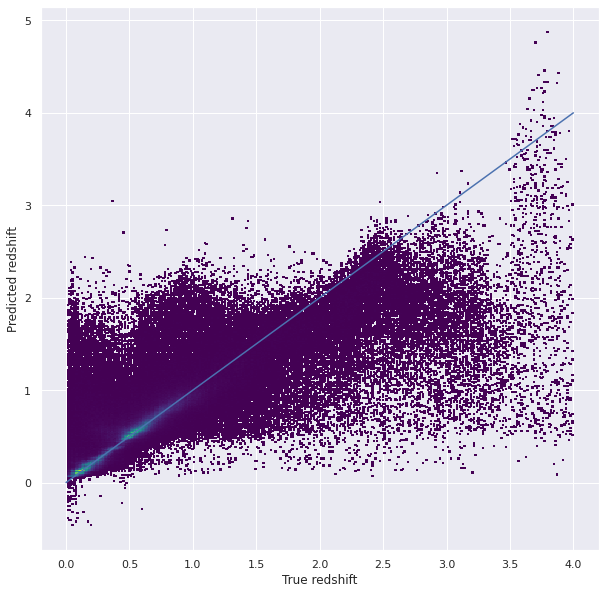

In [23]:
y_train_pred = xgb_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)
plot_predictions(y_train_pred, y_train)

In [10]:
metrics_agg = get_point_metrics(y_train_pred, y_train)
metrics_binned = get_point_metrics(y_train_pred, y_train, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",119396,0.136336,0.017129,0.020129,0.038238,0.038395,0.133179,0.097566
1,"(0.2, 0.4]",98405,0.181611,-0.002012,0.004214,0.054490,0.043965,0.199502,0.159067
2,"(0.4, 0.6]",139873,0.099553,0.011835,0.012150,0.038490,0.033272,0.125335,0.056544
3,"(0.6, 0.8]",105952,0.111418,0.000221,0.002138,0.045118,0.040322,0.117808,0.063935
4,"(0.8, 1.0]",53356,0.157300,-0.008796,-0.005941,0.056047,0.049027,0.146825,0.108479
5,"(1.0, 1.2]",23043,0.249646,-0.035527,-0.032501,0.093212,0.072343,0.144816,0.186608
6,"(1.2, 1.4]",12934,0.293956,-0.039850,-0.040917,0.126320,0.103338,0.079558,0.241070
7,"(1.4, 1.6]",8033,0.331289,-0.071879,-0.065812,0.135492,0.124913,0.058135,0.298643
8,"(1.6, 1.8]",6276,0.325222,-0.080408,-0.071829,0.128856,0.114540,0.071224,0.304493
9,"(1.8, 2.0]",5568,0.400833,-0.118712,-0.112301,0.124823,0.107381,0.074353,0.381106


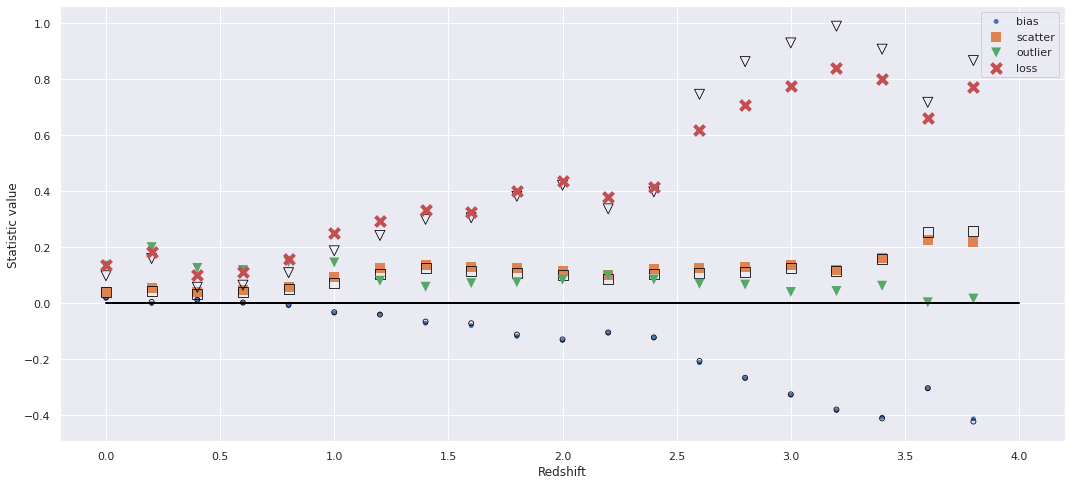

In [11]:
plot_point_metrics(metrics_binned)

## Evaluate test point estimates

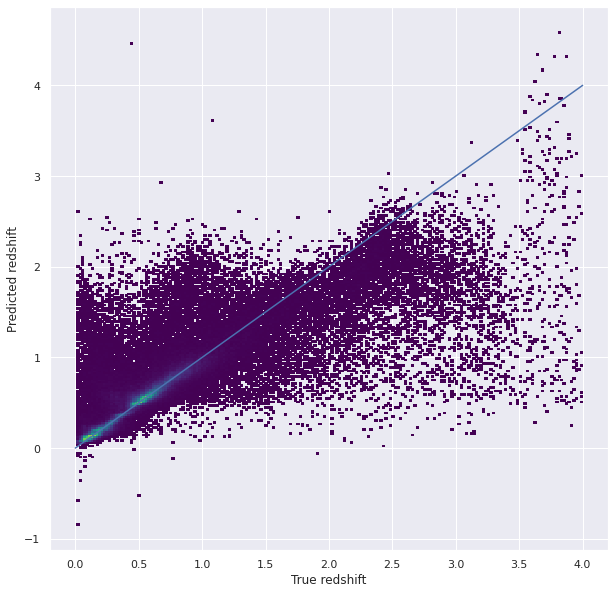

In [12]:
y_test_pred = xgb_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plot_predictions(y_test_pred, y_test)

In [13]:
metrics_agg = get_point_metrics(y_test_pred, y_test)
metrics_binned = get_point_metrics(y_test_pred, y_test, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",29880,0.136547,0.017104,0.020193,0.037967,0.038313,0.134337,0.098360
1,"(0.2, 0.4]",24534,0.185923,-0.002566,0.003853,0.054600,0.044313,0.202780,0.163813
2,"(0.4, 0.6]",35113,0.102145,0.011874,0.012094,0.038730,0.033508,0.127617,0.059123
3,"(0.6, 0.8]",26216,0.116614,0.000921,0.002961,0.045969,0.040900,0.122978,0.070377
4,"(0.8, 1.0]",13466,0.159924,-0.009388,-0.006199,0.056058,0.049743,0.148671,0.112060
5,"(1.0, 1.2]",5743,0.253535,-0.035438,-0.031470,0.093055,0.071743,0.153578,0.191886
6,"(1.2, 1.4]",3153,0.297742,-0.042587,-0.042781,0.127514,0.105420,0.079924,0.245480
7,"(1.4, 1.6]",2061,0.349061,-0.077551,-0.070806,0.142097,0.131178,0.044639,0.325085
8,"(1.6, 1.8]",1611,0.345402,-0.091697,-0.080724,0.136181,0.128175,0.055245,0.329609
9,"(1.8, 2.0]",1334,0.433151,-0.136870,-0.124809,0.130994,0.118896,0.053223,0.435532


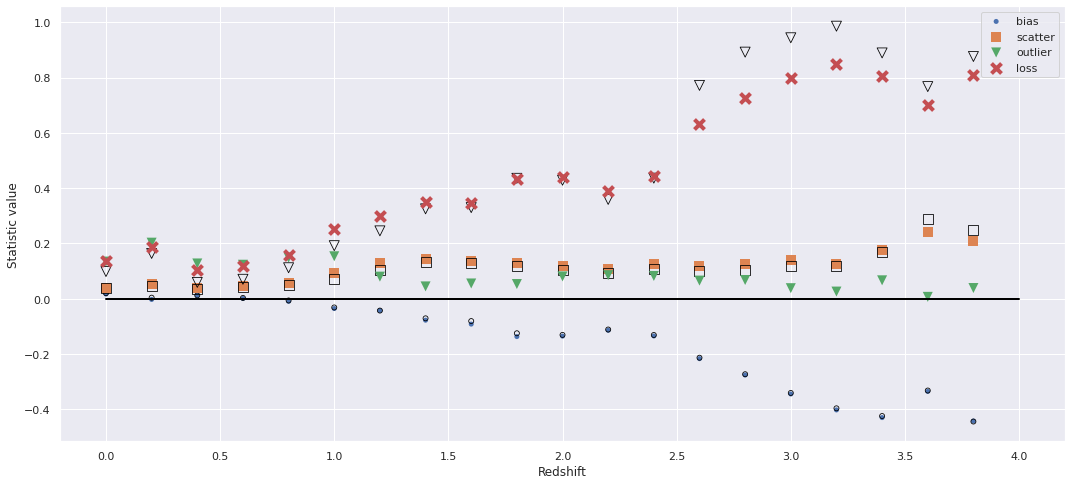

In [14]:
plot_point_metrics(metrics_binned)